In [9]:
import pandas as pd
import geopandas as gpd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [2]:
final = pd.read_csv('data/final_df.csv')
final.head()

,Unnamed: 0,hh_size,med_income,occ_units,med_rent,oo_hsng_un,perc_white,perc_non_w,perc_black,perc_owner,...,Roof Material_nan,Repair Condition_1.0,Repair Condition_2.0,Repair Condition_3.0,Repair Condition_nan,Renovation_1.0,Renovation_2.0,Renovation_nan,threshold_high,threshold_medium
0,0,1.95,NaN,236.0,873.0,117.0,0.574837,0.425163,0.234273,0.495763,...,0.801619,0.004049,0.190283,0.004049,0.801619,0.000000,0.0,1.000000,0,1
1,2,1.50,54297.0,1073.0,1071.0,327.0,0.663361,0.336639,0.249125,0.304753,...,0.924528,0.006289,0.069182,0.000000,0.924528,0.002096,0.0,0.997904,0,0
2,3,2.30,42778.0,712.0,1097.0,224.0,0.280774,0.719226,0.436694,0.314607,...,0.625442,0.000000,0.371025,0.003534,0.625442,0.000000,0.0,1.000000,0,1
3,4,2.69,39535.0,1424.0,1152.0,353.0,0.542930,0.457070,0.300637,0.247893,...,0.787551,0.000000,0.211096,0.001353,0.787551,0.000000,0.0,1.000000,0,1
4,5,2.99,52948.0,611.0,1023.0,114.0,0.465461,0.534539,0.326206,0.186579,...,0.694190,0.000000,0.305810,0.000000,0.694190,0.000000,0.0,1.000000,0,1


In [3]:
full_features = final.iloc[:, 1:-2]
threshold_medium = final.iloc[:, -1:]
threshold_high = final.iloc[:, -2:-1]

In [4]:
nans = []
for col in full_features.columns:
    if len(full_features.loc[full_features[col].isna()]) >= 1:
        nans.append(col)
for col in nans:
    full_features[col].fillna(full_features[col].median(), inplace=True)

In [5]:
x_train, x_test, y_train, y_test =  train_test_split(full_features, threshold_high, 
                                                        test_size=0.2, random_state=0)

GRID = {'RF__n_estimators': [100, 1000, 5000], 'RF__criterion': ['gini', 'entropy'], 'RF__max_depth': [1, 3, 5], 
                      'RF__min_samples_split': [2,5,10], 'RF__random_state': [0]}

pipe = Pipeline([('RF', RandomForestClassifier())])
grid_model = GridSearchCV(estimator=pipe,
                          param_grid=GRID,
                          cv=10,
                          return_train_score=True,
                          refit='accuracy',
                          scoring=('accuracy', 'precision', 'recall')
)


grid_model = grid_model.fit(x_train, np.ravel(y_train))
predicted_y = grid_model.predict(x_test)
cv_results = pd.DataFrame(grid_model.cv_results_)
ranked_cv=cv_results.sort_values(by=['rank_test_accuracy'])
ranked_cv[['param_RF__n_estimators', 'param_RF__criterion', 'param_RF__max_depth', 'param_RF__min_samples_split', 'rank_test_accuracy',
           'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall']]

/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-

/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-

/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-

/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-

/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-

/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-

/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-

/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-

/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-

/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-

/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-

/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-

/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-

/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tarrenpeterson/opt/anaconda3/lib/python3.8/site-

,param_RF__n_estimators,param_RF__criterion,param_RF__max_depth,param_RF__min_samples_split,rank_test_accuracy,mean_test_accuracy,mean_test_precision,mean_test_recall
19,1000,gini,5,2,1,0.760059,0.642347,0.196829
24,100,gini,5,10,2,0.759449,0.639618,0.194503
48,100,entropy,5,5,3,0.759438,0.646655,0.185254
49,1000,entropy,5,5,4,0.758825,0.669440,0.171300
25,1000,gini,5,10,5,0.758237,0.637828,0.189905
51,100,entropy,5,10,6,0.758230,0.642517,0.180708
53,5000,entropy,5,10,7,0.758222,0.662827,0.166755
46,1000,entropy,5,2,7,0.758222,0.662896,0.171353
22,1000,gini,5,5,9,0.757620,0.626921,0.189905
21,100,gini,5,5,10,0.757616,0.629417,0.196829


In [6]:
best_high = RandomForestClassifier(criterion='gini', max_depth=5, min_samples_split=2,
                                    n_estimators=1000, random_state=0)
best_high = best_high.fit(x_train, y_train)
best_high_predicted = best_high.predict(x_test)

<ipython-input-6-ab5ccb1e0ff4>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_high = best_high.fit(x_train, y_train)


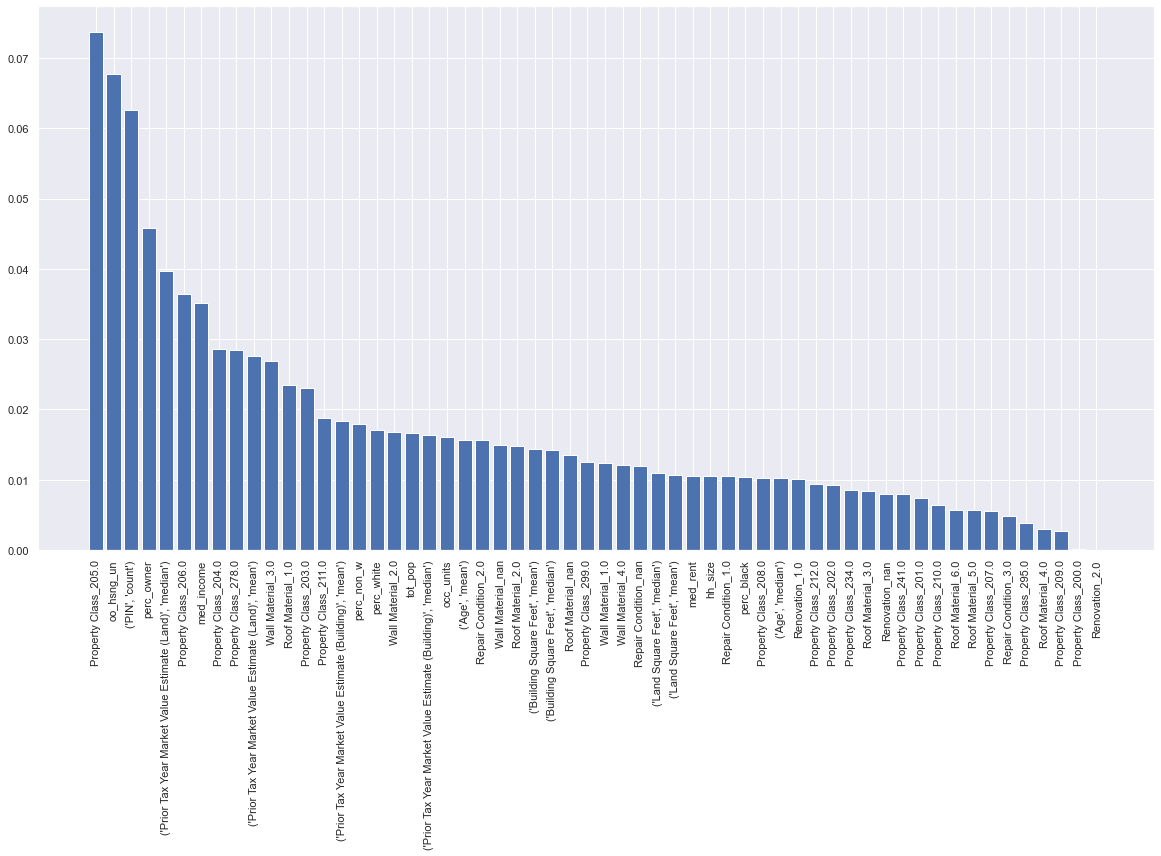

In [10]:
importances = best_high.feature_importances_

indices = np.argsort(importances)[::-1]

# Sort the labels in a corresponding fashion
labels = x_train.columns.values
names = [labels[i] for i in indices]

#len(importances)
# Plot
sns.set(rc={'figure.figsize':(20, 10)})
plt.figure()
plt.bar(range(len(importances)),importances[indices])
plt.xticks(range(len(importances)), names, rotation=90)
plt.show()

In [11]:
x_train, x_test, y_train, y_test =  train_test_split(full_features, threshold_medium, 
                                                        test_size=0.2, random_state=0)

GRID = {'RF__n_estimators': [100, 1000, 5000], 'RF__criterion': ['gini', 'entropy'], 'RF__max_depth': [1, 3, 5], 
                      'RF__min_samples_split': [2,5,10], 'RF__random_state': [0]}

pipe = Pipeline([('RF', RandomForestClassifier())])
grid_model = GridSearchCV(estimator=pipe,
                          param_grid=GRID,
                          cv=10,
                          return_train_score=True,
                          refit='accuracy',
                          scoring=('accuracy', 'precision', 'recall')
)


grid_model = grid_model.fit(x_train, np.ravel(y_train))
predicted_y = grid_model.predict(x_test)
cv_results = pd.DataFrame(grid_model.cv_results_)
ranked_cv=cv_results.sort_values(by=['rank_test_accuracy'])
ranked_cv[['param_RF__n_estimators', 'param_RF__criterion', 'param_RF__max_depth', 'param_RF__min_samples_split', 'rank_test_accuracy',
           'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall']]

,param_RF__n_estimators,param_RF__criterion,param_RF__max_depth,param_RF__min_samples_split,rank_test_accuracy,mean_test_accuracy,mean_test_precision,mean_test_recall
25,1000,gini,5,10,1,0.811833,0.821176,0.955818
22,1000,gini,5,5,1,0.811833,0.821174,0.955818
19,1000,gini,5,2,1,0.811833,0.821690,0.954998
49,1000,entropy,5,5,4,0.810617,0.819050,0.957457
46,1000,entropy,5,2,4,0.810617,0.818635,0.958277
53,5000,entropy,5,10,6,0.810613,0.819058,0.957457
50,5000,entropy,5,5,6,0.810613,0.819058,0.957457
52,1000,entropy,5,10,6,0.810613,0.818177,0.959090
47,5000,entropy,5,2,9,0.810004,0.818502,0.957457
23,5000,gini,5,5,9,0.810004,0.820858,0.953359


In [12]:
best_medium = RandomForestClassifier(criterion='gini', max_depth=5, min_samples_split=10,
                                    n_estimators=1000, random_state=0)
best_medium = best_medium.fit(x_train, y_train)
best_medium_predicted = best_medium.predict(x_test)

<ipython-input-12-a91af43509a0>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_medium = best_medium.fit(x_train, y_train)


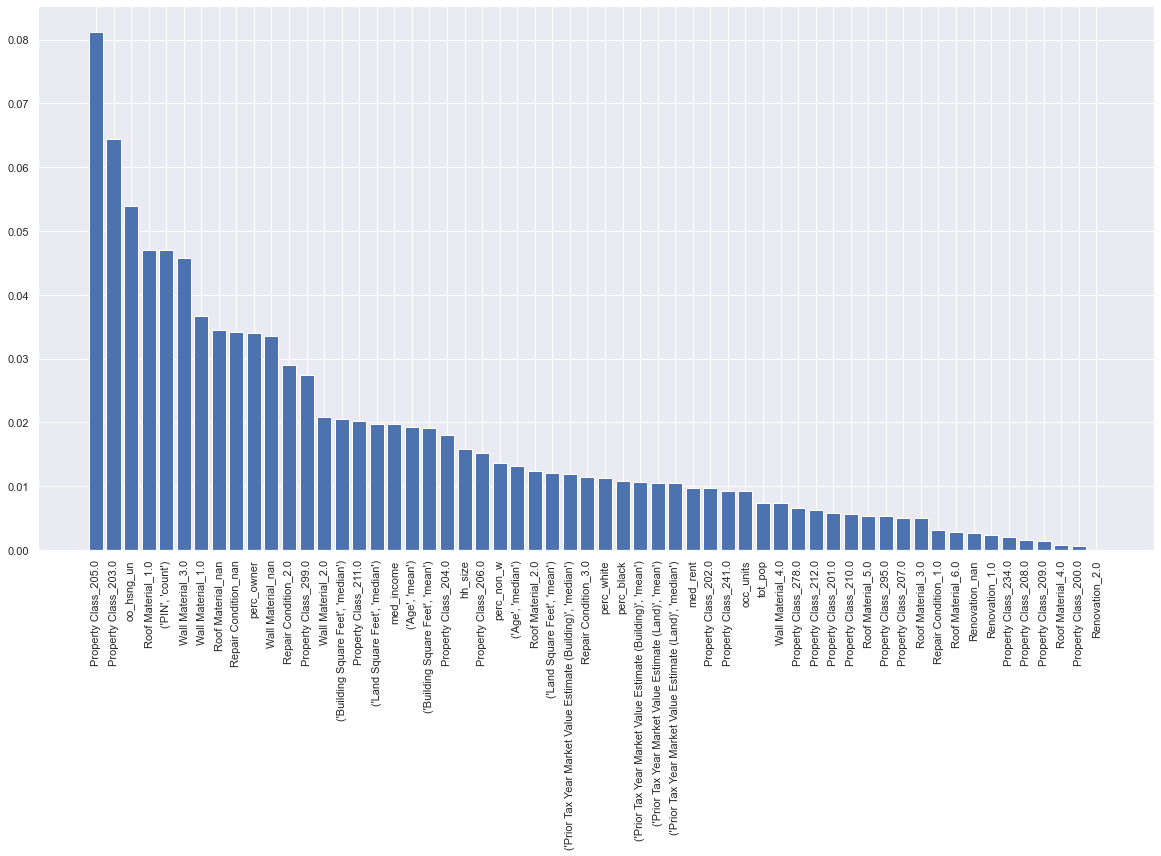

In [13]:
importances = best_medium.feature_importances_

indices = np.argsort(importances)[::-1]

# Sort the labels in a corresponding fashion
labels = x_train.columns.values
names = [labels[i] for i in indices]

#len(importances)
# Plot
sns.set(rc={'figure.figsize':(20, 10)})
plt.figure()
plt.bar(range(len(importances)),importances[indices])
plt.xticks(range(len(importances)), names, rotation=90)
plt.show()